# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


In [7]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Plan de solución

Paso 1. Descripción de los datos.   
  Para describir y entender los datos, primero leeremos los dataframes con el metodo csv, para ver su separador, si es diferente a **','** lo cambiaremos por el correcto con el parametro 'sep', posteriormente aplicaremos el método info() y describe() para todos los dataframes, con el fin de ver que tipo de datos tenemos, cuantas columnas y filas.   
  
  Además se revisarán las primeras filas de cada dataframe, para entender un poco los datos. 

In [70]:
# leer conjuntos de datos en los DataFrames
df_instacart=pd.read_csv('datasets/instacart_orders.csv',sep=';')
df_products=pd.read_csv('datasets/products.csv',sep=';')
df_aisles=pd.read_csv('datasets/aisles.csv',sep=';')
df_departments=pd.read_csv('datasets/departments.csv',sep=';')
df_order_products=pd.read_csv('datasets/order_products.csv',sep=';')

In [9]:
# mostrar información del DataFrame
print(df_instacart.head(5))
#Llamamos la función info:
df_instacart.info()
#Llamamos la función describe:
df_instacart.describe()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [10]:
# mostrar información del DataFrame
print(df_products.head(5))
#Llamamos la función info:
df_products.info()
#Llamamos la función describe:
df_products.describe()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [11]:
# mostrar información del DataFrame
print(df_aisles.head(10))
#Llamamos la función info:
df_aisles.info()
#Llamamos la función describe:
df_aisles.describe()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [12]:
# mostrar información del DataFrame
print(df_departments.head(10))
#Llamamos la función info:
df_departments.info()
#Llamamos la función describe:
df_departments.describe()

   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [13]:
# mostrar información del DataFrame
print(df_order_products.head(5))
#Llamamos la función info:
df_order_products.info()
#Llamamos la función describe:
df_order_products.describe()

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Paso 1. Descripción de los datos:
1. El dataframe instacart tiene información detallada de la actividad de los clientes respecto a las ordenes, el numero de veces y el tiempo en que se hizo una orden. Tiene 478967 filas y 6 columnas y se puede ver que tiene valores nulos en su última columna, los analizaremos más adelante.

2. El dataframe products tiene información de cada producto, junto con su id y los id's que relacionan cada producto con su departamento y categoría de pasillo. Tiene 49694 filas y 4 columnas, con valores nulos en el nombre del producto.

3. El dataframe aisles representa cada categoría de pasillo junto con su id. Tiene 134 filas y 2 columnas, no tiene valores nulos.

4. El dataframe department, representa cada departamento con su id. Tiene 21 filas y 2 columnas, no tiene nulos.

5. El dataframe order_products contiene la relación del id del producto con el id de la orden, también da información acerca del historico de las compras y si secuencia de compra en el carrito. Tiene 4343007 filas y 4 columnas.

# Paso 2. Preprocesamiento de los datos

## Plan de solución

Paso 2. Preprocesamiento de los datos:  
  - Primero vamos a identificar la cantidad de valores ausentes por columna, usando isna().sum(), para ver que tan significativo es el impacto de los ausentes, y verificamos que tan importante es la ausencia de los valores en cada categoría teniendo en cuenta la lógica del dataframe.

- Segundo, vamos a verificar si nuestros ausentes son de variables categóricas o cuantitativas. Si son categóricas verificamos si tiene un patrón para asignar estos ausentes, si son totalmente aleatorios los ausentes, debemos asignar una palabra para identificarlos. En caso de ser cuantitativos verificamos si hay atipicos, si tiene atipicos podemos rellenar con fillna() los ausentes usando la mediana, si no hay atipicos, podemos usar la media.

- Tercero, con respecto a los duplicados vamos a utilizar el método duplicated() o value_counts() para identificarlos, y verificar si son importantes o si simplemente los podemos borrar con drop_duplicates(), despues verificamos a mano si hay duplicados por distinción de minusculas o mayusculas, con el fin de limpiar nuestros datos.

## Encuentra y elimina los valores duplicados.

### `orders` data frame

In [14]:
# Revisa si hay pedidos duplicados
print('Numero de ordenes duplicadas: ',df_instacart['order_id'].duplicated().sum())
print()
print(df_instacart['order_id'].value_counts().head(15))
print()


Numero de ordenes duplicadas:  15

order_id
2282673    2
467134     2
1286742    2
2232988    2
1021560    2
1919531    2
408114     2
391768     2
1918001    2
1112182    2
794638     2
2125197    2
1782114    2
2845099    2
2160484    2
Name: count, dtype: int64



In [15]:
#Realizamos un filtro con el método query() para revisar si los duplicados tienen toda la línea duplicada 
lista=df_instacart['order_id'][df_instacart['order_id'].duplicated()==True]
print(df_instacart.query('order_id in @lista').sort_values(by='order_id'))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48          3 

Tenemos ordenes duplicadas que debemos eliminar, la particularidad que tienen es que todos son el miercoles a las 2 de la mañama.

In [16]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print('Número de pedidos que se hicieron el miércoles a las 2:00 a.m: ',df_instacart[(df_instacart['order_dow']==3)&(df_instacart['order_hour_of_day']==2)]['order_id'].count())
print('Número de pedidos DUPLICADOS que se hicieron el miércoles a las 2:00 a.m: ',df_instacart[(df_instacart['order_dow']==3)&(df_instacart['order_hour_of_day']==2)]['order_id'].duplicated().sum())

Número de pedidos que se hicieron el miércoles a las 2:00 a.m:  121
Número de pedidos DUPLICADOS que se hicieron el miércoles a las 2:00 a.m:  15


¿Qué sugiere este resultado?   
    **Tenemos 15 valores duplicados en de compras a las 2 am, por lo tanto es necesario eliminarlos. Además las ordenes no se         deberían duplicar por que son únicas.**

In [17]:
# Elimina los pedidos duplicados
df_instacart=df_instacart.drop_duplicates(subset='order_id').reset_index(drop=True)

In [18]:
# Vuelve a verificar si hay filas duplicadas
print('Numero de ordenes duplicadas: ',df_instacart['order_id'].duplicated().sum())
print()
print(df_instacart['order_id'].value_counts().head(15))
print()

Numero de ordenes duplicadas:  0

order_id
1515936    1
2365274    1
336622     1
684027     1
1115132    1
144990     1
833492     1
1616261    1
268316     1
668691     1
3131799    1
2597969    1
2675816    1
1459583    1
3375785    1
Name: count, dtype: int64



In [19]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('Número de duplicados: ',df_instacart['order_id'].duplicated().sum())

Número de duplicados:  0


  **Eliminamos la líneas duplicadas y quedamos únicamente con una línea para cada orden como debe ser.**

### `products` data frame

In [20]:
# Verifica si hay filas totalmente duplicadas
print('Número de duplicados: ',df_products.duplicated().sum())

Número de duplicados:  0


In [21]:
# Verifica únicamente si hay IDs duplicadas de productos
print('Número de duplicados: ',df_products['product_id'].duplicated().sum())

Número de duplicados:  0


In [22]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#Usamos el método upper() para convertir todos los nombres en minuscula
df_products['product_name']=df_products['product_name'].str.upper()
print(df_products['product_name'].value_counts().head(20))
print()
print('Valores únicos: ',df_products['product_name'].nunique(), 'Total nombres: ',df_products['product_name'].count())
print('Número de duplicados: ',df_products['product_name'].duplicated().sum())

product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
WILD SARDINES IN SPRING WATER                                           2
CHICKEN WITH RICE SOUP                                                  2
CHUNK LIGHT TUNA IN VEGETABLE OIL                                       2
ALBACORE SOLID WHITE TUNA IN WATER                                      2
FRESH SCENT DISHWASHER DETERGENT WITH DAWN                              2
18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP                               2
AMERICAN CHEESE SLICES                                                  2
VITAMIN D3 2000 IU                                                      2
CRUSHED TOMATOES WITH BAS

In [23]:
# Revisa si hay nombres duplicados de productos no faltantes
#Usamos el parámetro dropna=True para descartar los ausentes
df_product_dupl=df_products['product_name'].value_counts(dropna=True)
print(df_product_dupl.head(20))

product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
WILD SARDINES IN SPRING WATER                                           2
CHICKEN WITH RICE SOUP                                                  2
CHUNK LIGHT TUNA IN VEGETABLE OIL                                       2
ALBACORE SOLID WHITE TUNA IN WATER                                      2
FRESH SCENT DISHWASHER DETERGENT WITH DAWN                              2
18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP                               2
AMERICAN CHEESE SLICES                                                  2
VITAMIN D3 2000 IU                                                      2
CRUSHED TOMATOES WITH BAS

In [24]:
#Con esta línea verificamos si algunos de los nombres tienen líneas completamente duplicadas o si difieren en algunas columnas.

lista_2=df_products['product_name'][df_products['product_name'].duplicated()==True]
print(df_products.query('product_name in @lista_2').sort_values(by='product_name').head(20))


       product_id                               product_name  aisle_id  \
23339       23340  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
31844       31845  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
19941       19942            AGED BALSAMIC VINEGAR OF MODENA        19   
13152       13153            AGED BALSAMIC VINEGAR OF MODENA        19   
24830       24831         ALBACORE SOLID WHITE TUNA IN WATER        95   
22582       22583         ALBACORE SOLID WHITE TUNA IN WATER        95   
9037         9038                     AMERICAN CHEESE SLICES        21   
515           516                     AMERICAN CHEESE SLICES        21   
49530       49531               ANCHOVY FILLETS IN OLIVE OIL        95   
12325       12326               ANCHOVY FILLETS IN OLIVE OIL        95   
27802       27803                         APRICOT ENERGY BAR         3   
41221       41222                         APRICOT ENERGY BAR         3   
45230       45231                     

In [25]:
#filtro que contemple dos elementos: duplicados en product_name y que al mismo tiempo no sea un dato faltante.
filter_1=df_products['product_name'][(df_products['product_name'].duplicated()==True)&(~df_products['product_name'].isna())]
print(df_products.query('product_name in @filter_1').sort_values(by='product_name').head(20))

       product_id                               product_name  aisle_id  \
23339       23340  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
31844       31845  18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP        25   
19941       19942            AGED BALSAMIC VINEGAR OF MODENA        19   
13152       13153            AGED BALSAMIC VINEGAR OF MODENA        19   
24830       24831         ALBACORE SOLID WHITE TUNA IN WATER        95   
22582       22583         ALBACORE SOLID WHITE TUNA IN WATER        95   
9037         9038                     AMERICAN CHEESE SLICES        21   
515           516                     AMERICAN CHEESE SLICES        21   
49530       49531               ANCHOVY FILLETS IN OLIVE OIL        95   
12325       12326               ANCHOVY FILLETS IN OLIVE OIL        95   
27802       27803                         APRICOT ENERGY BAR         3   
41221       41222                         APRICOT ENERGY BAR         3   
45230       45231                     

  Podemos ver que tenemos una gran cantidad de duplicados al cambiar todo a mayusculas, sin embargo, no los eliminaremos debido a que si eliminamos todas las filas de estos duplicados, perderiamos parte de los id que identifican a estos duplicados y que se asocian con los otros dataframes, podemos ver que parte de los duplicados son nulos, más especificamente 104 valores.

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print('Número de duplicados: ',df_departments.duplicated().sum())

Número de duplicados:  0


In [27]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de duplicados: ',df_departments['department_id'].duplicated().sum())

Número de duplicados:  0


  Podemos ver que no hay id's duplicados ni filas totalmente duplicadas, por lo cual no hay necesidad de eliminar nada.


### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
print('Número de duplicados: ',df_aisles.duplicated().sum())

Número de duplicados:  0


In [29]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de duplicados: ',df_aisles['aisle_id'].duplicated().sum())

Número de duplicados:  0


  Nuevamente vemos que no hay duplicados para el dataframe aisles, por lo tanto no hay necesidad de eliminar nada.

### `order_products` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
print('Número de duplicados: ',df_order_products.duplicated().sum())

Número de duplicados:  0


In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
columns=['order_id','product_id']
#Utilizamos un for para revisar el numero de duplicados por columna
for column in columns:
    print(f'Número de duplicados de la columna {column}: ',df_order_products[column].duplicated().sum())
df_order_products['order_id'].value_counts(dropna=True)

Número de duplicados de la columna order_id:  4094961
Número de duplicados de la columna product_id:  4499434


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64


  Podemos ver que se ven duplicados en order_id y en product_id, sin embargo, esto se debe a que hay ordenes que tienen varios productos, por esto se repiten los numeros de orden, de la misma manera pasa con los productos, hay diferentes ordenes que tienen el mismo producto, por esta razón se pueden repetir los numeros de los productos.

Elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [32]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Numero de nombres ausentes: ',df_products['product_name'].isna().sum())

Numero de nombres ausentes:  1258


Tenemos varios nombres de productos ausentes en el dataframe con un total de 1258

In [33]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products_isna=df_products[df_products['product_name'].isna()]
print(df_products_isna)
#Hacemos un groupby para revisar si absolutamente todos los registros pertenecen al pasillo 100
df_products_isna.groupby('aisle_id')['aisle_id'].count()

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


aisle_id
100    1258
Name: aisle_id, dtype: int64


  Si se puede concluír que todos los ausentes están relacionados con el numero de pasillo 100

In [34]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
#Hacemos un groupby para revisar si absolutamente todos los registros pertenecen al departamento 21
df_products_isna.groupby('department_id')['department_id'].count()

department_id
21    1258
Name: department_id, dtype: int64

 
También se puede concluír que todos los ausentes tienen que ver con el departamento 21.

In [35]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles['aisle_id']==100])
print(df_departments[df_departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


 
  El departamento 21 y el pasillo 100 hace parte a la categoría 'missing', es decir que no tienen departamento ni pasillo aisgnado. 

In [36]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown',inplace=True)
print(df_products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



  Al reemplazar 'Unknown' en los nombres de los productos ausentes, podemos descartar estos para el análisis.

### `orders` data frame

In [37]:
# Encuentra los valores ausentes
print(df_instacart.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [38]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
columns=['order_id', 'user_id', 'order_number']
#Se usa un for para revisar si hay valor cero en los id
for column in columns:
    print(df_instacart[df_instacart[column]==0])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []



  Al revisar los ausentes, no se ve ningún ausente en el dataframe de ordenes o valor extraño.

### `order_products` data frame

In [39]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [40]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order_products['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

 
  Podemos ver que el máximo de la columna 'add_to_cart_order' es 64 y el mínimo es 1

In [41]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products_isna=df_order_products['order_id'][df_order_products['add_to_cart_order'].isna()==True].sort_values()
print(order_products_isna)

2437093       9310
3195573      61355
3941595      61355
2968806      61355
3965219      61355
            ...   
3760909    3383594
3784932    3383594
2772397    3383594
1537276    3383594
1038616    3383594
Name: order_id, Length: 836, dtype: int64


In [42]:
order_product_filtered=df_order_products.query('order_id in @order_products_isna').sort_values(by='order_id')
print(order_product_filtered.sample(20))

         order_id  product_id  add_to_cart_order  reordered
982493     293169       25623               37.0          1
2465286   1625713       47912               16.0          0
4124108   2721963       48642               49.0          1
578511    1800005       22113                2.0          1
4497340   2256933       18761               29.0          0
719076    2256933        7010               63.0          1
1954118    404157        4592                NaN          0
1601821    264710        1143                NaN          1
1094589   1648217       24363               46.0          1
2397081   1220886       38159               19.0          1
841052     404157        8518               42.0          1
1866356   2721963       36216               29.0          1
3682014   2136777        4920               24.0          1
3609913    293169       26209               54.0          0
4067055   2625444       38371                5.0          1
2617464   1832957       10424           

In [43]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_groupby_product_id=order_product_filtered.groupby('order_id')['product_id'].count().sort_values(ascending=False)
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print('¿Todos los pedidos con valores ausentes tienen más de 64 productos?\n',df_groupby_product_id.head(30))
print()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print('Máximo:',df_groupby_product_id.max(),'\nMínimo: ',df_groupby_product_id.min())

¿Todos los pedidos con valores ausentes tienen más de 64 productos?
 order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
102236      95
1730767     95
2926893     92
1800005     92
1386261     91
264710      91
936852      87
3125735     86
2721963     86
1717990     86
813364      85
1968313     80
1832957     78
1673227     78
844733      77
293169      77
404157      76
2449164     76
2849370     75
1183255     75
903110      74
1888628     74
871281      74
1961723     73
2094761     73
Name: product_id, dtype: int64

Máximo: 127 
Mínimo:  65


 
  Podemos ver que los valores nulos son porque los la columna 'add_to_cart' solo cuenta hasta 64 valores en el carrito, quiere decir que si una orden tiene más de 64 productos, del producto 64, en adelante, el valor en esta columna será nulo. Podemos ver que las ordenes que tienen valores nulos, tienen mínimo 65 productos y maximo 127 productos, esto prueba nuestro argumento de porque se presentan nulos en esta columna.

In [44]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999,inplace=True)
print(df_order_products['add_to_cart_order'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.   
  Al rellenar los valores de la columna 'add_to_cart_order' con 999 sabemos que es un valor en el carrito posterior al producto 64.

## Conclusiones

Paso 2. Preprocesamiento de los datos

En conclusión los valores duplicados de los dataframes son normales a excepción del dataframe 'products', que tiene nombres repetidos para varios id de producto, y el dataframe instacart, debido a que teniamos líneas repetidas para varios pedidos del miércoles a las 2 am.

Los ausentes importantes que arreglamos fueron los de los dataframes products y order_products, donde en el dataframe products tenemos valores ausentes en los nombres, los cuales reemplazamos por el nombre 'Unknown' para diferenciarlos. Por otro lado en el dataframe 'order_products' reemplazamos los ausentes por '999' debido a que son ordenes que exceden los 64 productos y no están mapeados en el dataframe. 


# Paso 3. Análisis de los datos


### [A1] Verifica que los valores sean sensibles

In [45]:
print('Análisis order_hour_of_day:n',df_instacart['order_hour_of_day'].describe())
print('\nAnálisis order_dow:\n',df_instacart['order_dow'].describe())

Análisis order_hour_of_day:n count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

Análisis order_dow:
 count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Escribe aquí tus conclusiones  
  **Los datos de 'order_hour_of_day' oscilan entre 0 y 23, mientras que 'order_dow' oscila entre 0 y 6 como lo vemos en los análisis estadisticos.**

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [46]:
#Función para agregar etiquetas de datos
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

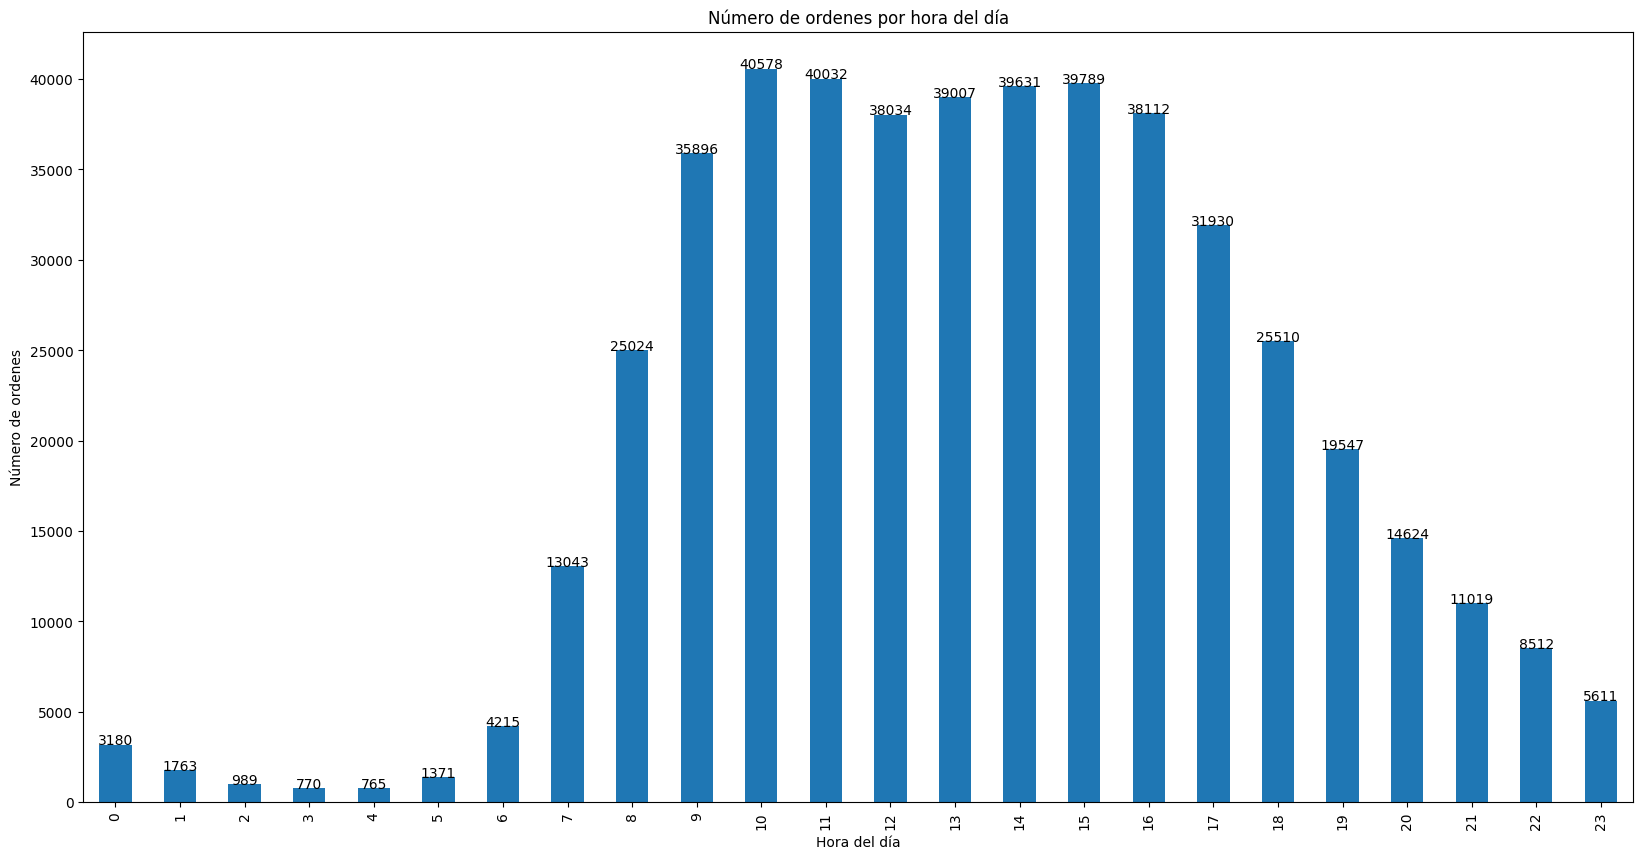

In [47]:

df_a2=df_instacart.groupby('order_hour_of_day')['order_id'].count().reset_index()
df_a2.sort_values(by='order_hour_of_day',inplace=True)
df_a2.plot(kind='bar',
            x='order_hour_of_day',
            y='order_id',
            xlabel='Hora del día',
            ylabel='Número de ordenes',
            title='Número de ordenes por hora del día',
            legend=False,
           figsize=[20,10]
          )
addlabels(df_a2['order_hour_of_day'],df_a2['order_id'])
plt.show()

Podemos concluír que a las 10 se realizan más compras, y a las 3 se hacen menos compras.

### [A3] ¿Qué día de la semana compran víveres las personas?

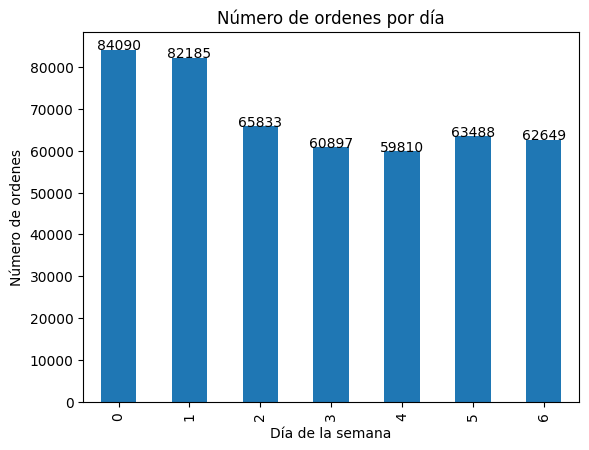

In [48]:
df_a3=df_instacart.groupby('order_dow')['order_id'].count().reset_index()
df_a3.sort_values(by='order_dow',inplace=True)
df_a3.plot(kind='bar',
            x='order_dow',
            y='order_id',
            xlabel='Día de la semana',
            ylabel='Número de ordenes',
            title='Número de ordenes por día',
            legend=False,
          )
addlabels(df_a3['order_dow'],df_a3['order_id'])
plt.show()

Podemos concluír que los domingos y los lunes son los días que más viveres se compran, y el día jueves es el día en que menos compras se hacen.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [49]:
df_instacart['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

<Axes: title={'center': 'Tiempo de espera para hacer un nuevo pedido'}, ylabel='Frequency'>

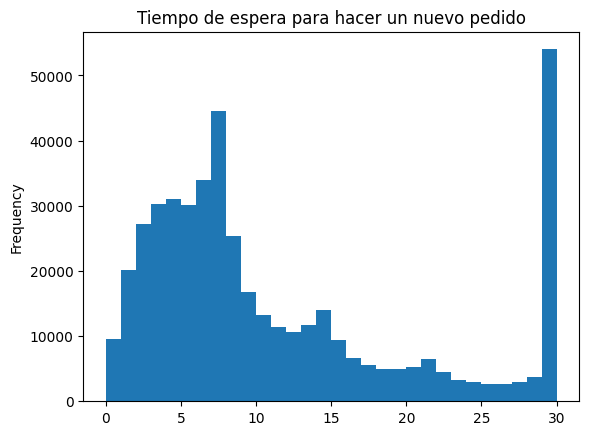

In [50]:
df_instacart['days_since_prior_order'].plot(kind='hist',
                                            title='Tiempo de espera para hacer un nuevo pedido',
                                            bins=30
                                           )


Las personas suelen tomar con más frecuencia 30 días para hacer un nuevo pedido, seguido de 7 días para hacer un pedido, y las personas toman con menos frecuencia 27 días para hacer una nueva compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección.
</div>

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

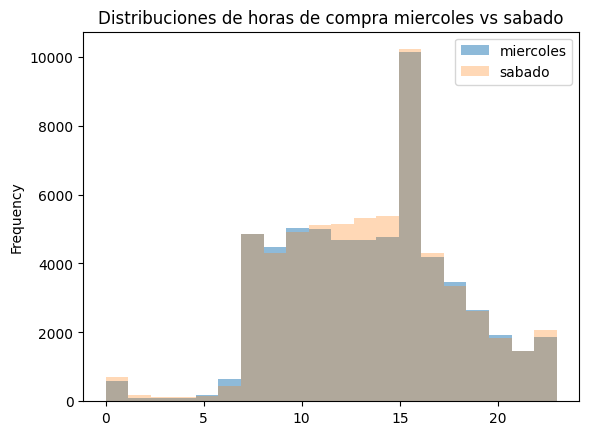

In [51]:
df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=20,alpha=0.5)
df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=20,alpha=0.3)
plt.legend(['miercoles','sabado'])
plt.title('Distribuciones de horas de compra miercoles vs sabado')

plt.show()


In [52]:
df_b1=df_instacart.groupby(df_instacart[df_instacart['order_dow'] == 3]['order_hour_of_day'])['order_id'].count().reset_index()
df_b11=df_instacart.groupby(df_instacart[df_instacart['order_dow'] == 6]['order_hour_of_day'])['order_id'].count().reset_index()
df_columns=df_b1.merge(df_b11,on='order_hour_of_day')
df_columns.columns=['order_hour_of_day','miercoles','sabado']
df_columns

,order_hour_of_day,miercoles,sabado
0,0.0,373,464
1,1.0,215,254
2,2.0,106,177
3,3.0,101,125
4,4.0,108,118
5,5.0,170,161
6,6.0,643,451
7,7.0,1732,1619
8,8.0,3125,3246
9,9.0,4490,4311


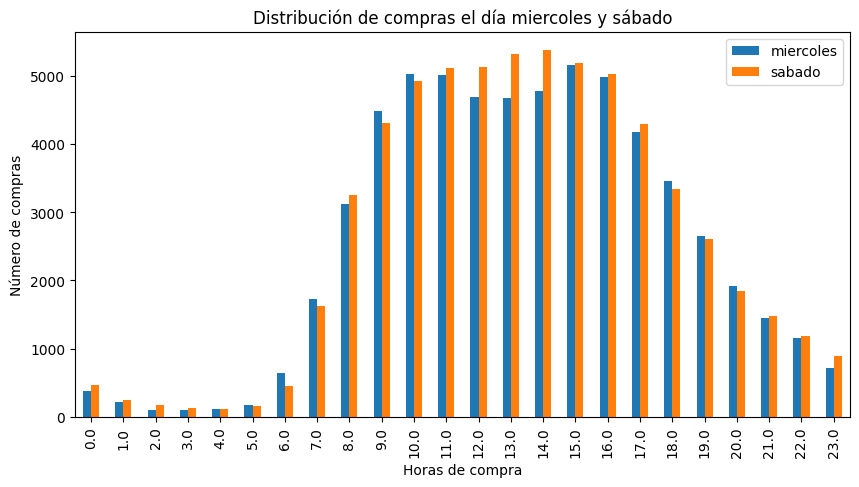

In [53]:

df_columns.plot(kind='bar', 
           x='order_hour_of_day',
           y=['miercoles','sabado'],
           xlabel='Horas de compra',
           ylabel='Número de compras',
           title='Distribución de compras el día miercoles y sábado',
            figsize=[10,5])
plt.show()

Podemos ver que las distribuciones de compras entre el miercoles y el sabado son similares, sin embargo, varían entre las 12 del medio día y las 2pm, debido a que esas horas es cuando más compras hay los sabados, en cambio, los miercoles a las 10am se aumentan las compras, después de las 11am disminuyen y a las 3pm vuelven a aumentar. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

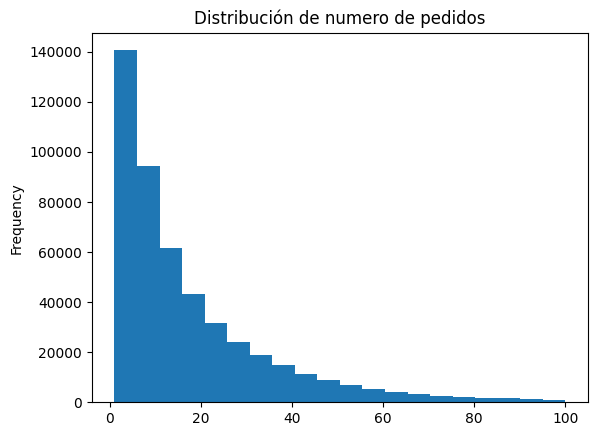

In [54]:
df_instacart['order_number'].plot(kind='hist',
                                bins=20,
                                title='Distribución de numero de pedidos'
                                 )
plt.show()

Podemos ver que la distribución es de una frecuencia mayor al ser la primera compra, y va disminuyendo periodicamente a medida que aumenta el numero de pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [55]:
df_most_popular=df_order_products.merge(df_products,on='product_id')
df_most_popular.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7.0,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4.0,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8.0,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23.0,0,CHICKEN BREAST TENDERS BREADED,129,1
5,847715,11440,13.0,0,CHICKEN BREAST TENDERS BREADED,129,1
6,1463503,11440,1.0,0,CHICKEN BREAST TENDERS BREADED,129,1
7,331884,11440,5.0,1,CHICKEN BREAST TENDERS BREADED,129,1
8,1869056,11440,12.0,1,CHICKEN BREAST TENDERS BREADED,129,1
9,1772832,11440,3.0,1,CHICKEN BREAST TENDERS BREADED,129,1


In [56]:
df20_most_popular=df_most_popular.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
df20_most_popular1=df20_most_popular.head(20)
df20_most_popular1

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

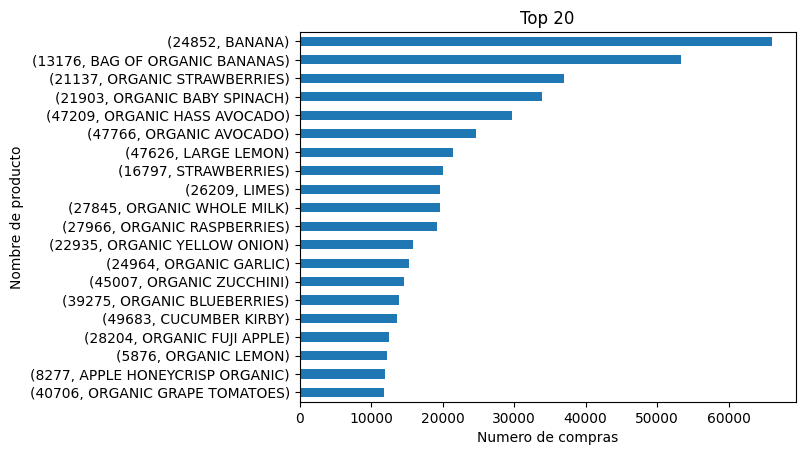

In [57]:
ax = df20_most_popular1.plot.barh(x='product_name', y='order_id')
plt.title('Top 20')
plt.xlabel('Numero de compras')
plt.ylabel('Nombre de producto')
ax.invert_yaxis()
plt.show()

Podemos ver en el siguiente gráfico, los 20 productos más populares, destacando la banana de primero, la bolsa de bananas organicas de segundo y la fresa organica de tercero.

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [58]:
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype('int')
df_order_products1=df_order_products[df_order_products['add_to_cart_order']!=999]
df_order_products2=df_order_products1.groupby('order_id')['add_to_cart_order'].max().sort_values(ascending=False)
df_order_products2.head(10)
print('En promedio se compran ',df_order_products2.mean().round(0),' arrticulos.')

En promedio se compran  10.0  arrticulos.


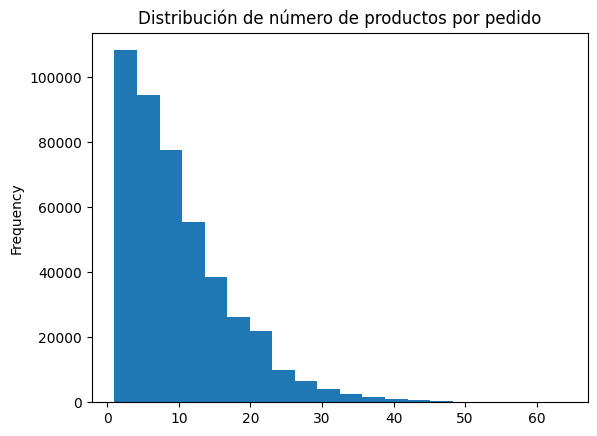

In [59]:
df_order_products2.plot(kind='hist',
                       bins=20,
                       title='Distribución de número de productos por pedido')
plt.show()

Podemos concluír que se compran en promedio 10 productos por pedido, y a su distribución va disminuyendo a medida que la cantidad de productos aumenta.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

In [60]:
df_reordered_most_popular=df_most_popular[df_most_popular['reordered']==1]
df_reordered_most_popular.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,147172,11440,7.0,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4.0,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8.0,1,CHICKEN BREAST TENDERS BREADED,129,1
7,331884,11440,5.0,1,CHICKEN BREAST TENDERS BREADED,129,1
8,1869056,11440,12.0,1,CHICKEN BREAST TENDERS BREADED,129,1
9,1772832,11440,3.0,1,CHICKEN BREAST TENDERS BREADED,129,1
10,1726915,11440,5.0,1,CHICKEN BREAST TENDERS BREADED,129,1
12,594538,11440,3.0,1,CHICKEN BREAST TENDERS BREADED,129,1
13,3028788,11440,11.0,1,CHICKEN BREAST TENDERS BREADED,129,1
14,3202886,11440,3.0,1,CHICKEN BREAST TENDERS BREADED,129,1


In [61]:
df20_reordered_most_popular=df_reordered_most_popular.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
df20_reordered_most_popular1=df20_reordered_most_popular.head(20)
df20_reordered_most_popular1

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

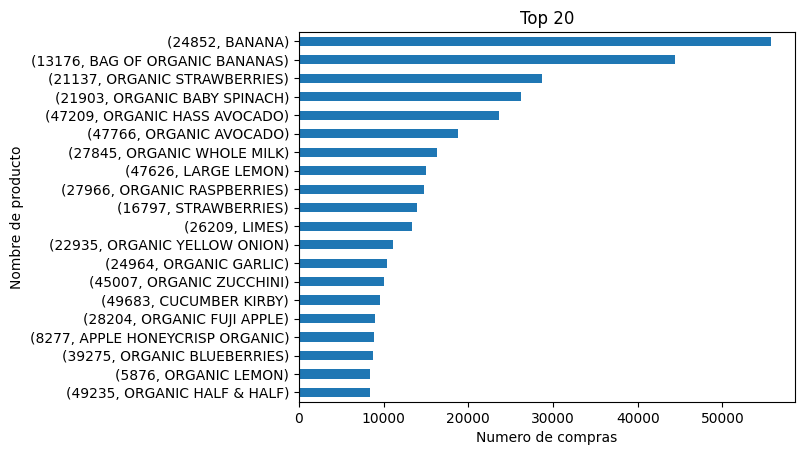

In [62]:
ax = df20_reordered_most_popular1.plot.barh(x='product_name', y='order_id')
plt.title('Top 20')
plt.xlabel('Numero de compras')
plt.ylabel('Nombre de producto')
ax.invert_yaxis()
plt.show()

Se puede evidenciar en la anterior gráfica que los 20 productos que más se reordenan, comenzando con la banana de primero, posteriormente la bolsa de bananas de segundo y la fresa organica de tercero. Si comparamos este top 20 con el primero top 20 que se realizó con los productos en general, vemos un producto que no aparecen en el top general, como lo es el Medio y medio organico.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [63]:
df20_reordered_most_popular1=df20_reordered_most_popular.reset_index()
df20_most_popular1=df20_most_popular.reset_index()
df_proporcion=df20_most_popular1.merge(df20_reordered_most_popular1,on='product_id')
df_proporcion.drop('product_name_y',axis=1,inplace=True)
df_proporcion['proporcion']=(df_proporcion['order_id_y']/df_proporcion['order_id_x'])
df20_proporcion=df_proporcion.head(20)
df20_proporcion

,product_id,product_name_x,order_id_x,order_id_y,proporcion
0,24852,BANANA,66050,55763,0.844254
1,13176,BAG OF ORGANIC BANANAS,53297,44450,0.834006
2,21137,ORGANIC STRAWBERRIES,37039,28639,0.773212
3,21903,ORGANIC BABY SPINACH,33971,26233,0.772217
4,47209,ORGANIC HASS AVOCADO,29773,23629,0.793639
5,47766,ORGANIC AVOCADO,24689,18743,0.759164
6,47626,LARGE LEMON,21495,15044,0.699884
7,16797,STRAWBERRIES,20018,13945,0.696623
8,26209,LIMES,19690,13327,0.676841
9,27845,ORGANIC WHOLE MILK,19600,16251,0.829133


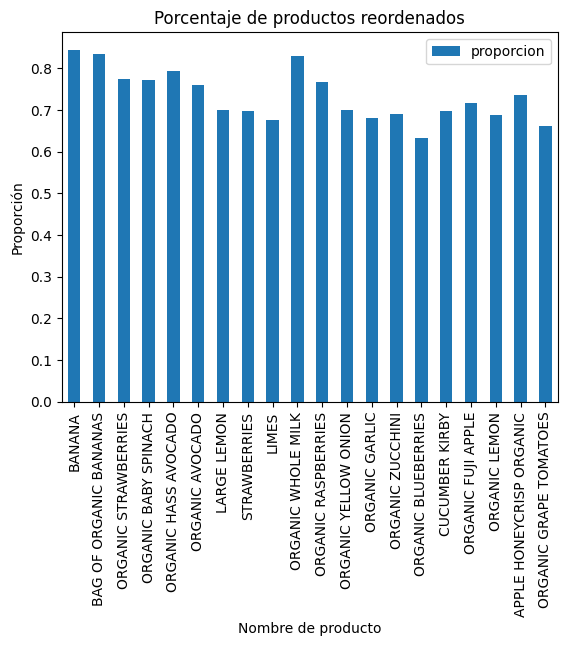

In [64]:
df20_proporcion.plot(kind='bar',
                  x='product_name_x',
                  y='proporcion',
                  xlabel='Nombre de producto',
                  ylabel='Proporción',
                  title='Porcentaje de productos reordenados',
                  rot=90
                    )

plt.show()

Podemos ver en la anterior tabla la proporción que tiene cada producto en ser reordenado, en la columna 'porporcion, adicionalmente, podemos ver en la anterior gráfica, la tasa de reordenamiento de los 20 productos más populares, destacando con una tasa de reordenamiento alta para las bananas, la bolsa de bananas organicas y la leche entera organica.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [65]:
df_clients=df_order_products.merge(df_instacart,on='order_id')
df_clients_order=df_clients.groupby('user_id', as_index=False)['order_id'].count().sort_values(by='order_id',ascending=False)
df_clients_reordered=df_clients[df_clients['reordered']==1]
df_clients_reordered1=df_clients_reordered.groupby('user_id',as_index=False)['order_id'].count().sort_values(by='order_id',ascending=False)

In [66]:
df_proporcion2=df_clients_order.merge(df_clients_reordered1,on='user_id')
df_proporcion2['proporcion']=(df_proporcion2['order_id_y']/df_proporcion2['order_id_x'])
df20_proporcion2=df_proporcion2.head(20)
df20_proporcion2

,user_id,order_id_x,order_id_y,proporcion
0,103634,580,477,0.822414
1,33731,540,437,0.809259
2,137629,526,444,0.844106
3,23371,506,428,0.845850
4,164055,504,449,0.890873
5,59819,481,436,0.906445
6,4694,480,386,0.804167
7,186704,467,410,0.877944
8,166951,458,402,0.877729
9,201268,457,401,0.877462


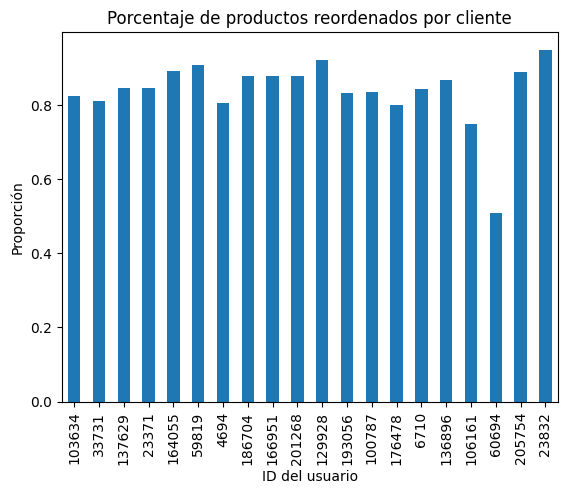

In [67]:
df20_proporcion2.plot(kind='bar',
                  x='user_id',
                  y='proporcion',
                  xlabel='ID del usuario',
                  ylabel='Proporción',
                  title='Porcentaje de productos reordenados por cliente',
                  rot=90,
                  legend=False
                    )

plt.show()

Podemos ver en la anterior tabla la proporción que tienen los productos de cada cliente en ser reordenados, en la columna 'porporcion', adicionalmente, podemos ver en la anterior gráfica, la tasa de reordenamiento de los 20 clientes que más compras tienen, destacando con una tasa de reordenamiento alta para el cliente 23832 con tasa de 94%.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [68]:
df_most_popular_first=df_most_popular[df_most_popular['add_to_cart_order']==1]
df20_most_popular_first=df_most_popular_first.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
df20_most_popular_first=df20_most_popular_first.head(20)
df20_most_popular_first

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

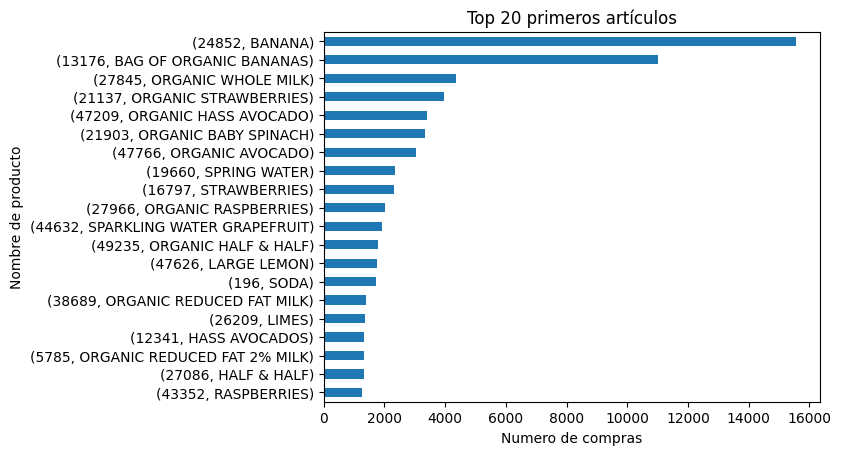

In [69]:
ax = df20_most_popular_first.plot.barh(x='product_name', y='order_id')
plt.title('Top 20 primeros artículos')
plt.xlabel('Numero de compras')
plt.ylabel('Nombre de producto')
ax.invert_yaxis()
plt.show()

Se puede evidenciar en la anterior gráfica los 20 articulos principales que los clientes ordenan de primero en sus carritos, destacando las bananasm la bolsa de bananas organica y la leche entera organica.

### Conclusion general del proyecto:

En general, podemos concluír que los productos como las bananas, la bolsa organica de bananas, lasfresas organicas y la leche entera organica, se repiten siendo parte de los 20 productos más populares, los 20 articulos que más se reordenan y los 20 productos que se eligen de primero en sus carritos, entre otros más que se repiten en en esta recompilación, por lo cual pueden considerarse productos básicos.

Adicionalmente, se puede considerar que estos productos se reordenan constantemente, viendo su proporción de reordenamiento, debido a que en la mayoría de las ocasiones, más del 80% se termina reordenando.

Los clientes que más compras tienen también tienden a reordenar sus productos, del total mas del 80% de productos se reordenan, por lo cual se cuenta con una fidelizaón del cliente alta.

Con respecto a la cantidad de productos que se piden por orden, podemos ver que con frecuencia se piden entre 0 a 10 productos, y va disminuyendo a medida que aumenta el numero de productos.

Los días que más compras se realizan son los domingos y los lunes, las horas donde más se compra son entre las 2pm y las 3pm, y los clientes generalmente compran cada 30 dias.